In [1]:
from clean import clean

In [2]:
df = clean('./data/train.csv')

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,year,month,week,day,...,StateHoliday_new,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,353.0,3139.0,820.0,1,0.0,1.0,2013,1,1,1,...,a,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,353.0,2686.0,835.0,1,0.0,1.0,2013,1,1,2,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
2,353.0,2628.0,815.0,1,0.0,1.0,2013,1,1,3,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
3,353.0,2677.0,856.0,1,0.0,1.0,2013,1,1,4,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
4,353.0,2224.0,719.0,1,0.0,0.0,2013,1,1,5,...,0,b,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov"


In [4]:
df['week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [5]:
df['month_start'].unique()

array([ True, False])

In [6]:
from feature_engineering import * 

creating conversion table


/Users/elenastein/DSR/m_comp/feature_engineering.py:14: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  conversion = creating_conversion_table()
/Users/elenastein/DSR/m_comp/feature_engineering.py:16: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  df = creating_df_with_sorted_id(conversion)


converting the holidays


In [7]:
df.isna().sum()

Store                        0
Sales                        0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
year                         0
month                        0
week                         0
day                          0
day_week                     0
month_start                  0
month_end                    0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
sorted id                    0
holiday_bool                 0
dtype: int64

In [8]:
#fill with average competition distance, month and year, Promo2 Since Week, Promo since year
df[df['Promo2']==0].isna().sum()
df.PromoInterval.unique()

array(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec', 'None'],
      dtype=object)

In [15]:
#error metric
import numpy as np
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [10]:
my_imputer = SimpleImputer(strategy='mean')
final_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [12]:
X_train = pd.read_csv('./X_train.csv', index_col=True)
X_valid = pd.read_csv('./X_valid.csv')
y_train = pd.read_csv('./y_train.csv')
y_valid = pd.read_csv('./y_valid.csv')

In [24]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_valid)



print(metric(preds, y_valid.loc[:,'Sales']))

KeyboardInterrupt: 

In [47]:
print(metric(preds, y_valid.values))

inf


/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


array([[197691.91,   4793.4 ],
       [309286.88,   8327.59],
       [ 63305.92,   5353.39],
       ...,
       [210790.93,   7711.  ],
       [188874.07,   5446.08],
       [244415.9 ,   7847.61]])

In [66]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return actuals

In [46]:
y_valid[y_valid['Sales']==0].shape

(0, 2)

In [68]:
actuals = metric(preds, y_valid.values)

In [71]:
O in actual 

(198952,)

In [72]:
0 in y_valid.values 

True

In [45]:
np.linalg.norm(0)

0.0

In [22]:
df = pd.read_csv('./transformed.csv')

In [23]:
df.head()

,Unnamed: 0,Store,Sales,Customers,Open,Promo,SchoolHoliday,year,month,week,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,sorted id,holiday_bool
0,0,353.0,3139.0,820.0,1,0.0,1.0,2013,1,1,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,1
1,1,353.0,2686.0,835.0,1,0.0,1.0,2013,1,1,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0
2,2,353.0,2628.0,815.0,1,0.0,1.0,2013,1,1,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0
3,3,353.0,2677.0,856.0,1,0.0,1.0,2013,1,1,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0
4,4,353.0,2224.0,719.0,1,0.0,0.0,2013,1,1,...,b,900.0,7.0,2009.0,1,14.0,2013.0,"Feb,May,Aug,Nov",268,0


In [48]:
np.sqrt(preds.shape[0])

315.39816105995294

In [50]:
np.linalg.norm(1/y_valid.values)

/Users/elenastein/opt/anaconda3/envs/dkb_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

In [54]:
y_valid[y_valid['Sales']<=0]

,Unnamed: 0,Sales


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d7231d30>,
      dtype=object)

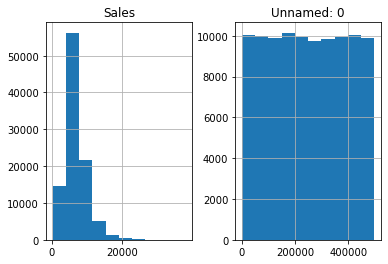

In [55]:
y_valid.hist()

In [59]:
predictions_df = pd.DataFrame(preds)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d46bd400>,
      dtype=object)

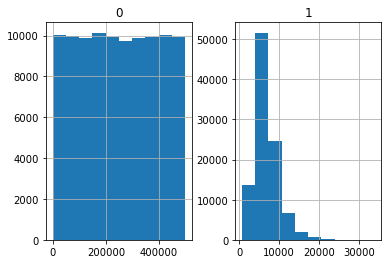

In [62]:
predictions_df.hist()